# Titanic survivor prediction


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
import seaborn as sns

In [110]:
dataset = pd.read_csv(r"D:\prcatice_code\ML_PRACTICE\LOGISTIC_REGRESSION\titanic_survivor_prediction\titanic_dataset.csv")

In [111]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [113]:
dataset.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [114]:
dataset.isna().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [115]:
dataset = dataset.drop(["PassengerId","Cabin","Name","Ticket"] , axis = 1)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [116]:
le_1 = LabelEncoder()
le_1.fit(dataset['Sex'])
dataset['Sex'] = le_1.transform(dataset['Sex']) # Male = 1 && Female = 0
le_2 = LabelEncoder()
le_2.fit(dataset['Embarked'])
dataset['Embarked'] = le_2.transform(dataset['Embarked']) # S = 2 && C = 0
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,0,3,1,NaN,0,0,8.0500,2
1305,1,1,0,39.0,0,0,108.9000,0
1306,0,3,1,38.5,0,0,7.2500,2
1307,0,3,1,NaN,0,0,8.0500,2


In [117]:
imputer_1 = SimpleImputer(strategy = "mean")
imputer_1.fit(dataset[["Age"]])
dataset["Age"] = imputer_1.transform(dataset[["Age"]])
imputer_2 = SimpleImputer(strategy = "most_frequent")
imputer_2.fit(dataset[["Embarked"]])
dataset["Embarked"] = imputer_2.transform(dataset[["Embarked"]])
imputer_3 = SimpleImputer(strategy = "mean")
imputer_3.fit(dataset[["Fare"]])
dataset["Fare"] = imputer_3.transform(dataset[["Fare"]])
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,0,3,1,29.881138,0,0,8.0500,2
1305,1,1,0,39.000000,0,0,108.9000,0
1306,0,3,1,38.500000,0,0,7.2500,2
1307,0,3,1,29.881138,0,0,8.0500,2


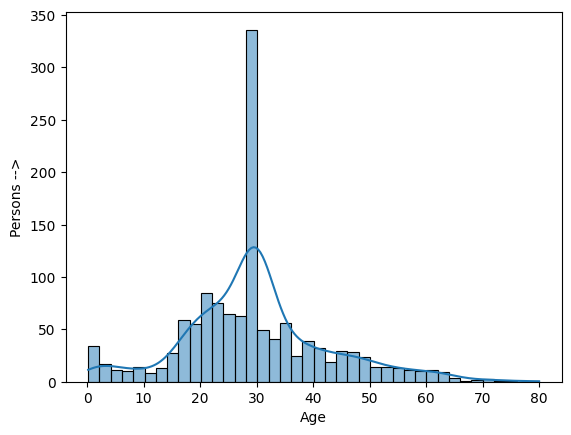

In [118]:
sns.histplot(dataset['Age'],kde=True,bins=40)
plt.ylabel('Persons -->')
plt.show()

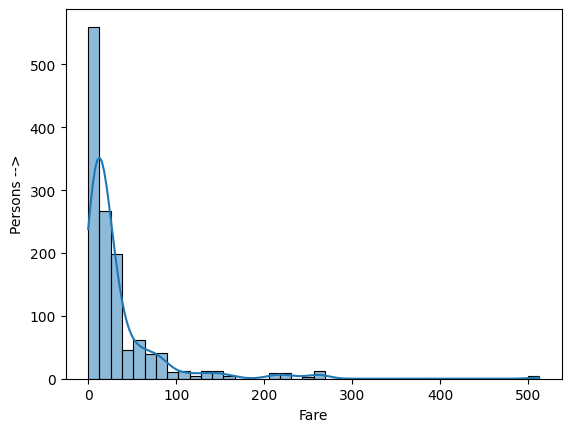

In [119]:
sns.histplot(dataset['Fare'],kde=True,bins=40)
plt.ylabel('Persons -->')
plt.show()

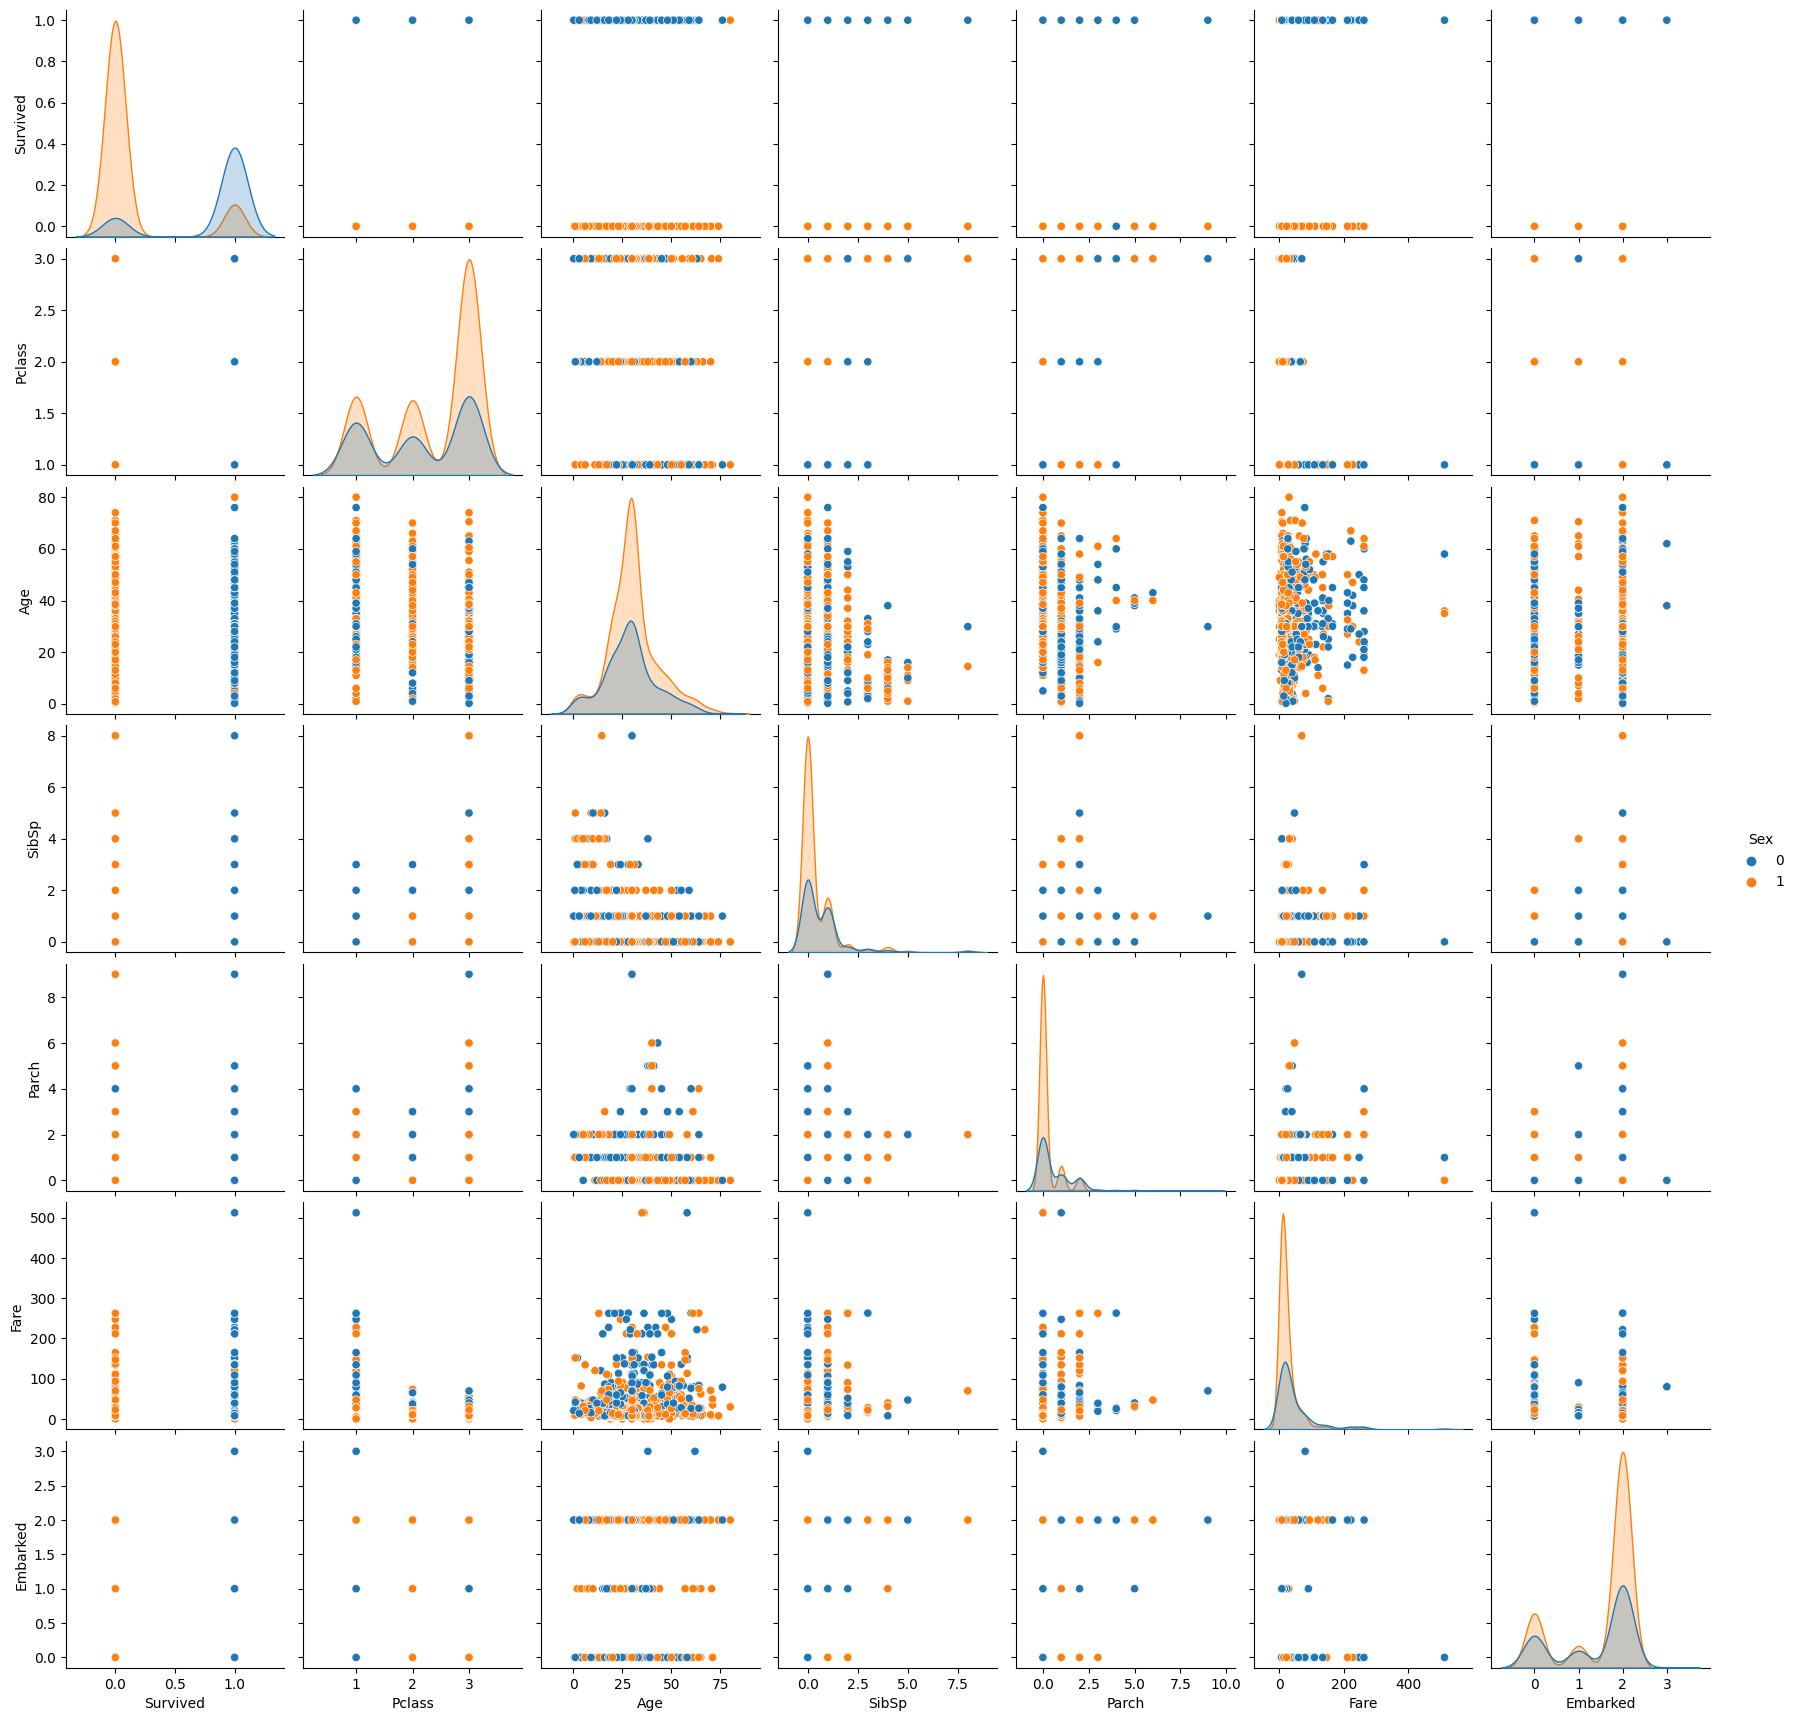

In [120]:
sns.pairplot(dataset,hue='Sex')

In [121]:
dataset.isna().mean() * 100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [122]:
X = dataset.drop("Survived",  axis=1).values
X

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  1.        , 38.5       , ...,  0.        ,
         7.25      ,  2.        ],
       [ 3.        ,  1.        , 29.88113767, ...,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  1.        , 29.88113767, ...,  1.        ,
        22.3583    ,  0.        ]])

In [123]:
Y = dataset.iloc[:,0].values
Y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [124]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [125]:
Xtrain

array([[ 1.        ,  1.        , 45.        , ...,  0.        ,
        83.475     ,  2.        ],
       [ 3.        ,  0.        , 37.        , ...,  0.        ,
         9.5875    ,  2.        ],
       [ 1.        ,  1.        , 70.        , ...,  1.        ,
        71.        ,  2.        ],
       ...,
       [ 1.        ,  1.        , 29.88113767, ...,  0.        ,
        25.7417    ,  0.        ],
       [ 3.        ,  0.        , 29.88113767, ...,  0.        ,
         7.55      ,  2.        ],
       [ 3.        ,  1.        , 29.88113767, ...,  0.        ,
         7.55      ,  2.        ]])

In [126]:
Xtest

array([[ 3.        ,  1.        , 29.88113767, ...,  2.        ,
        69.55      ,  2.        ],
       [ 3.        ,  1.        , 21.        , ...,  0.        ,
         7.925     ,  2.        ],
       [ 3.        ,  0.        , 29.        , ...,  2.        ,
        15.2458    ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.88113767, ...,  0.        ,
        23.25      ,  1.        ],
       [ 2.        ,  0.        , 29.88113767, ...,  0.        ,
        21.        ,  2.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.8542    ,  2.        ]])

In [127]:
Ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
Ytest

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [129]:
sc = StandardScaler()
Xtrain[:,:] = sc.fit_transform(Xtrain[:,:])
Xtest[:,:] = sc.fit_transform(Xtest[:,:])

In [130]:
LoR = LogisticRegression(random_state=0)
LoR.fit(Xtrain,Ytrain)

LogisticRegression(random_state=0)

In [131]:
Yestim = LoR.predict(Xtest)

In [132]:
Yestim

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [133]:
print(np.concatenate((Yestim.reshape(len(Yestim),1) , Ytest.reshape(len(Ytest) , 1)) , 1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [134]:
cm = confusion_matrix(Ytest,Yestim)

In [135]:
print(cm)

[[138  11]
 [ 32  81]]


In [136]:
print(accuracy_score(Ytest,Yestim))

0.8358778625954199


In [137]:
print(precision_score(Ytest,Yestim))

0.8804347826086957
